In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy.stats as st
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from scipy.stats import t
from sklearn import linear_model
from matplotlib import pyplot

In [36]:
df = pd.read_csv('voice.csv')
df = df.dropna()
#df.head()
y0 = df.label.values
#X = df.kurt.values 
X0 = df.drop('label', axis='columns') #X = df.meanfreq.values #df.drop('label', axis='columns') #df.drop(columns=[0, 2,5,7,14, 4, 20])  #df.drop('label', axis='columns')
#X = df.drop('kurt', axis='columns')
#X.drop(X.columns[[0, 1, 3, 5, 8, 10, 11, 13, 14, 17]], axis=1, inplace=True)
le = LabelEncoder()
le.fit(y0)
newy0 = le.transform(y0)
Xtrain0, Xtest0, ytrain0, ytest0 = train_test_split(X0, newy, test_size=0.2, random_state=0)
df.head()



,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
newX = df.drop(['Q25','IQR','meanfun', 'label'], axis = 'columns')
le = LabelEncoder()
le.fit(y)
newy = le.transform(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, newy, test_size=0.2, random_state=0)
df.head()
len(df)
len (newX)
len(newy)

3168

In [5]:
logRegL1 = Pipeline([
    ('standardize', StandardScaler()),
    ('reg', LogisticRegression(penalty='l1', solver='liblinear'))
      
])

logRegL2 = Pipeline([
    ('standardize', StandardScaler()),
    ('reg', LogisticRegression(penalty='l2'))
])

In [6]:
#Covariance Matrix
# Initiate logistic regression object
logit = linear_model.LogisticRegression(penalty='l1', solver='liblinear')

# Fit model. Let X_train = matrix of predictors, y_train = matrix of variable.
# NOTE: Do not include a column for the intercept when fitting the model.
resLogit = logit.fit(Xtrain, ytrain)

# Calculate matrix of predicted class probabilities.
# Check resLogit.classes_ to make sure that sklearn ordered your classes as expected
predProbs = resLogit.predict_proba(Xtrain)

# Design matrix -- add column of 1's at the beginning of your X_train matrix
X_design = np.hstack([np.ones((Xtrain.shape[0], 1)), Xtrain])

# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.diagflat(np.product(predProbs, axis=1))

# Covariance matrix
# Note that the @-operater does matrix multiplication in Python 3.5+, so if you're running
# Python 3.5+, you can replace the covLogit-line below with the more readable:
#covLogit = np.linalg.inv(X_design.T @ V @ X_design)
covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
#print("Covariance matrix: ", covLogit)

# Standard errors
#print("Standard errors: ", np.sqrt(np.diag(covLogit)))

# Wald statistic (coefficient / s.e.) ^ 2
logitParams = np.insert(resLogit.coef_, 0, resLogit.intercept_)
#print("Wald statistics: ", (logitParams / np.sqrt(np.diag(covLogit))) ** 2)

In [7]:
predProbs.shape

(2534, 2)

In [8]:
#Coeffs for models with all the features 
logRegL1.fit(np.c_[newX],newy)
logRegL2.fit(np.c_[newX],newy)
#logRegL1.get_params([np.c_[newX],newy])

coefs1 = logRegL1.named_steps['reg'].coef_
coefs2=logRegL2.named_steps['reg'].coef_

print(coefs1,coefs2)

[[-2.4116022   0.08378607  0.11115937  1.97790104  1.19201882 -0.65014237
   3.47792666 -3.51122073  0.38033904 -1.08126092  0.11207081 -0.72181068
   0.05272516 -0.08568983  0.          0.00569898 -0.22275691]] [[-1.66976176e+00  1.31242462e-01  7.65949382e-02  1.91583874e+00
   1.09195815e+00 -5.89896326e-01  3.32798375e+00 -3.36864596e+00
   3.72808849e-01 -1.66976176e+00  1.14189999e-01 -7.17152100e-01
   5.93565738e-02 -8.89471907e-02 -3.57556561e-04  1.24183225e-03
  -2.24511226e-01]]


In [9]:
coefs1=coefs1.flatten()
coefs1.shape

(17,)

In [15]:

cv_score = []
for column in Xtrain:
    inputC = Xtrain[column].values
    tmp_score=cross_val_score(logRegL1, inputC.reshape(-1, 1), ytrain, cv=10, scoring='neg_mean_squared_error')
    cv_score.append(-tmp_score.mean())
    #print('logReg1', -cv_score.mean())

cv_score=cross_val_score(logRegL2, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
print('logReg2', -cv_score.mean())

logReg2 0.028414926395070178


In [236]:
'''
#boot straping
def BootstrapCoef(data,numboot,regr):
    #theta=np.zeros((numboot,17))
    zeta=np.zeros((numboot,17))
    #teza=np.zeros((numboot,17,17))
    
    
    n = len(data)
    
    
    #theta = np.zeros((numboot,2))    
    for i in range(numboot):
        d = data.sample(n, replace=True)
        Xboot=d.drop(['Q25','IQR','meanfun', 'label'], axis = 'columns')
        y = d.label.values
        le = LabelEncoder()
        le.fit(y)
        newy = le.transform(y)
        
        
        X_fit = np.c_[Xboot]
        regr.fit(X_fit,newy)
        
        
        #theta=(logRegL1.named_steps['reg'].intercept_)
        zeta[i,:]=(regr.named_steps['reg'].coef_ )
        #teza=[theta,zeta[i,:]]
    return zeta

'''

In [11]:
co1=BootstrapCoef(df,300,logRegL1)
co1[i,:].shape

NameError: name 'BootstrapCoef' is not defined

In [244]:
co2=BootstrapCoef(df,300,logRegL2)
co2


array([[-1.67627995e+00,  1.64178817e-01,  1.98585830e-01, ...,
         2.89816088e-04,  2.34844331e-03, -2.34552225e-01],
       [-1.60126499e+00, -1.00396861e-01, -1.89538569e-01, ...,
        -3.43373174e-02, -3.31328331e-02, -2.01934203e-01],
       [-1.60877829e+00,  6.14281723e-02,  3.82819587e-02, ...,
        -6.13260216e-02, -6.03252478e-02, -3.07100703e-01],
       ...,
       [-1.52721515e+00,  1.68907855e-01,  6.26766582e-02, ...,
        -2.33908434e-02, -2.40845657e-02, -3.57237285e-01],
       [-1.77266152e+00, -3.66076123e-02,  3.70785581e-01, ...,
         1.31318050e-02,  1.37176174e-02, -1.59653363e-01],
       [-1.61136798e+00,  3.64009291e-01,  2.47067233e-01, ...,
         2.18633054e-03,  2.28672954e-03, -3.81567390e-01]])

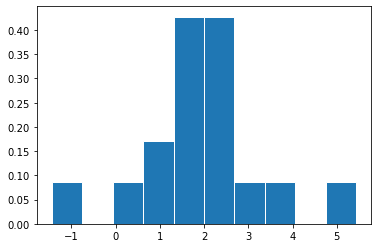

<Figure size 432x288 with 0 Axes>

My confidence interval is between -6.761125423542875  and  -1.0919900982763342


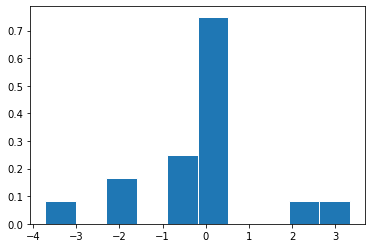

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.707201509930481  and  3.128855301764358


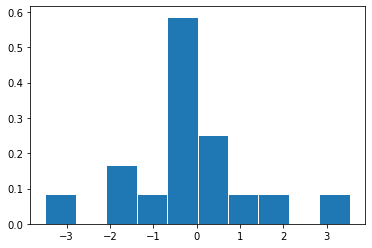

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.768968078942925  and  2.9403960322865657


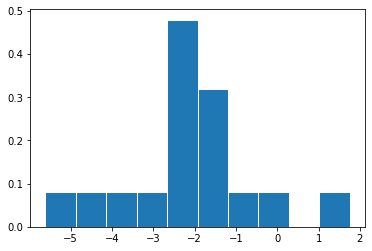

<Figure size 432x288 with 0 Axes>

My confidence interval is between 0.9293956610427732  and  7.006745615609406


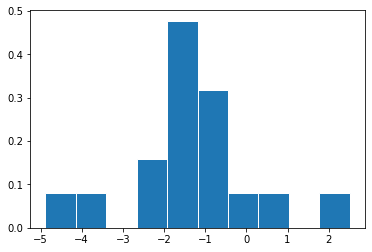

<Figure size 432x288 with 0 Axes>

My confidence interval is between -0.6201809726657233  and  5.53982560179019


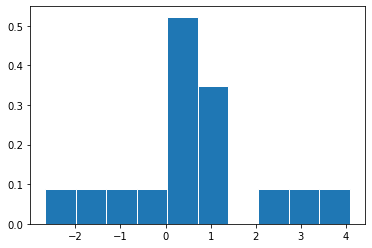

<Figure size 432x288 with 0 Axes>

My confidence interval is between -4.2234054225040465  and  1.6076288690990448


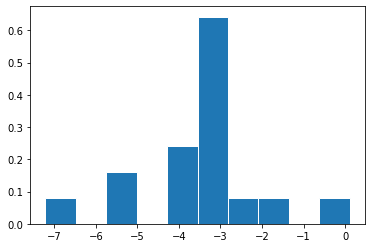

<Figure size 432x288 with 0 Axes>

My confidence interval is between 4.006820071222211  and  10.064616058803072


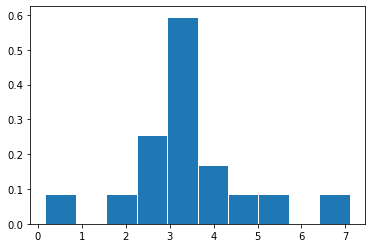

<Figure size 432x288 with 0 Axes>

My confidence interval is between -9.909580760632844  and  -4.298489839684864


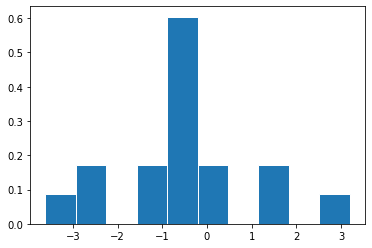

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.249110858616615  and  3.482107083515557


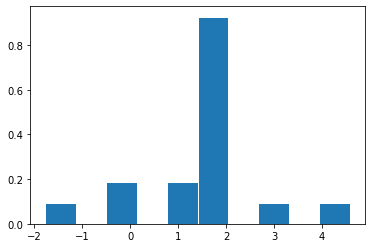

<Figure size 432x288 with 0 Axes>

My confidence interval is between -5.561583343855132  and  -0.4296901641407216


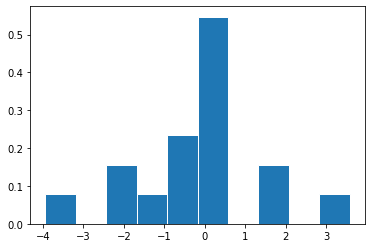

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.7683730380717195  and  3.258765669758002


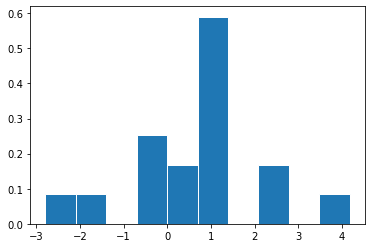

<Figure size 432x288 with 0 Axes>

My confidence interval is between -4.32373309571628  and  1.5199920507293476


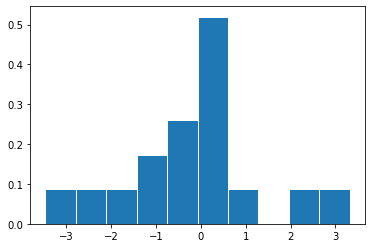

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.736362244108355  and  3.0796825139226547


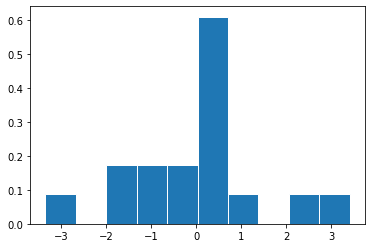

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.9913894644538686  and  2.6803405428812463


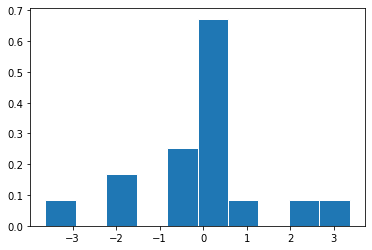

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.8944931296767757  and  3.0172842311353056


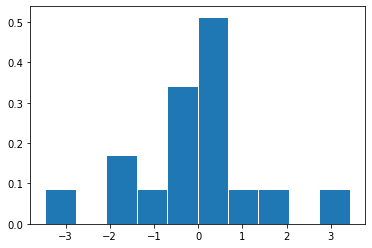

<Figure size 432x288 with 0 Axes>

My confidence interval is between -2.8603968783057656  and  2.8196061944758517


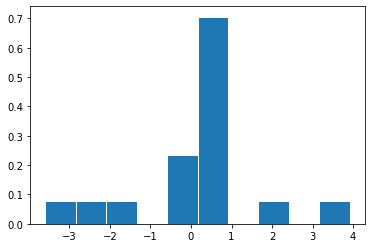

<Figure size 432x288 with 0 Axes>

My confidence interval is between -3.391856596676759  and  2.810184370374274


In [261]:
#confidence interval for the features, LogRegL1
i=0
while i < 17:

   bs_res = co1[i,:]-coefs1[i]
   #print(bs_res)

   plt.hist(bs_res, edgecolor = 'white', density=True)
   plt.figure()
   plt.show() 
   
   ci_lower, ci_upper = np.quantile(bs_res, [0.025, 0.975])
   boot_ci = [coefs1[i] - ci_upper, 
              coefs1[i]- ci_lower]

   print('My confidence interval is between', boot_ci[0], ' and ', boot_ci[1])
   i=i+1 

In [12]:
#Bootstrap for accuracies

def BootstrapPred(data,numboot,regr):
    Y_Pred=[]   
    #y_pred=np.zeros((numboot,3168))
    Acc=[]
    #n_size=int(n*0.5)
    
    n=len(data)
    #theta = np.zeros((numboot,2))    
    for i in range(numboot):
    
        
        
        d = data.sample(n, replace=True)
        y = d.label.values
        le = LabelEncoder()
        le.fit(y)
        newy = le.transform(y)
        
        Xboot=d.drop(['Q25','IQR','meanfun', 'label'], axis = 'columns')
        
        
        
        
        
        #Xtrain, Xtest, ytrain, ytest = train_test_split(Xboot,newy,test_size=0.5, random_state=0)
        
        
        X_fit = np.c_[Xboot]
        regr.fit(X_fit,newy)
        X=np.array(Xboot)
        
        y_pred=regr.predict(X)
        Y_Pred.append(y_pred)
        
        
        classes=regr.fit(X_fit,newy).classes_
        tp = sum(np.logical_and(y_pred == classes[1], newy == classes[1]))
        tn = sum(np.logical_and(y_pred == classes[0], newy == classes[0]))
        fp = sum(np.logical_and(y_pred == classes[1], newy == classes[0]))
        fn = sum(np.logical_and(y_pred == classes[0], newy == classes[1]))

        #print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
        acc = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)    
        sensitivity = recall
        specificity = tn / (fp + tn)
        Acc.append(acc)


    return Acc


In [13]:
Acc1=BootstrapPred(df,300,logRegL1)


In [17]:
print(Acc1)

[0.8386994949494949, 0.8519570707070707, 0.8386994949494949, 0.8503787878787878, 0.8380681818181818, 0.8377525252525253, 0.8308080808080808, 0.8377525252525253, 0.8358585858585859, 0.8472222222222222, 0.834280303030303, 0.8611111111111112, 0.8488005050505051, 0.8450126262626263, 0.8494318181818182, 0.8560606060606061, 0.8459595959595959, 0.8617424242424242, 0.853219696969697, 0.8361742424242424, 0.8279671717171717, 0.851010101010101, 0.8469065656565656, 0.8491161616161617, 0.8273358585858586, 0.8424873737373737, 0.8585858585858586, 0.8557449494949495, 0.84375, 0.8516414141414141, 0.8686868686868687, 0.8488005050505051, 0.8516414141414141, 0.8525883838383839, 0.8273358585858586, 0.8579545454545454, 0.8456439393939394, 0.8462752525252525, 0.8459595959595959, 0.8585858585858586, 0.834280303030303, 0.8484848484848485, 0.8465909090909091, 0.8390151515151515, 0.8465909090909091, 0.8554292929292929, 0.8443813131313131, 0.8402777777777778, 0.8323863636363636, 0.8478535353535354, 0.852272727272

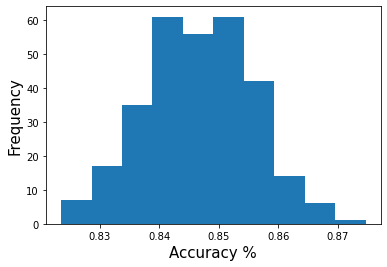

95.0 confidence interval 83.0% and 86.3%


In [31]:
# plot Accs
pyplot.xlabel('Accuracy %',fontsize=15)
pyplot.ylabel('Frequency',fontsize=15)
pyplot.hist(Acc1)
pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\ConfidenceInterval1.png')
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(Acc1, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(Acc1, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))



In [27]:
Acc2=BootstrapPred(df,300,logRegL2)


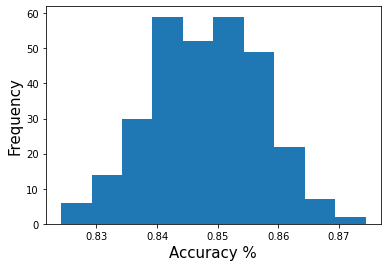

95.0 confidence interval 83.0% and 86.5%


In [30]:
# plot Accs
pyplot.xlabel('Accuracy %',fontsize=15)
pyplot.ylabel('Frequency',fontsize=15)
pyplot.hist(Acc2)
pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\ConfidenceInterval2.png')
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(Acc2, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(Acc2, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [33]:
def compute_performance(yhat, y, classes):
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    #print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    acc = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)    
    sensitivity = recall
    specificity = tn / (fp + tn)
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3))

    #print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          #"Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))


#d

for column in Xtrain:
    inputC = Xtrain[column].values
    res = logRegL1.fit(inputC.reshape(-1, 1), ytrain)
    
    testInputC = Xtest[column].values
    ytest_hat = res.predict(testInputC.reshape(-1, 1))
    print(column, ':-----------------------')
    compute_performance(ytest_hat, ytest, res.classes_)

#res = logRegL2.fit(Xtrain, ytrain)
#ytest_hat = res.predict(Xtest)
#compute_performance(ytest_hat, ytest, res.classes_)

meanfreq :-----------------------
Accuracy: 0.651 Recall: 0.571 Precision: 0.709
sd :-----------------------
Accuracy: 0.782 Recall: 0.823 Precision: 0.776
median :-----------------------
Accuracy: 0.642 Recall: 0.568 Precision: 0.695
Q25 :-----------------------
Accuracy: 0.853 Recall: 0.856 Precision: 0.864
Q75 :-----------------------
Accuracy: 0.525 Recall: 0.502 Precision: 0.553
IQR :-----------------------
Accuracy: 0.894 Recall: 0.934 Precision: 0.874
skew :-----------------------
Accuracy: 0.486 Recall: 0.081 Precision: 0.574
kurt :-----------------------
Accuracy: 0.491 Recall: 0.078 Precision: 0.619
sp.ent :-----------------------
Accuracy: 0.738 Recall: 0.73 Precision: 0.762
sfm :-----------------------
Accuracy: 0.65 Recall: 0.595 Precision: 0.695
mode :-----------------------
Accuracy: 0.67 Recall: 0.523 Precision: 0.777
centroid :-----------------------
Accuracy: 0.651 Recall: 0.571 Precision: 0.709
meanfun :-----------------------
Accuracy: 0.954 Recall: 0.967 Precision:

In [37]:
#Accuracy for LogRegL1 for when we have absoultoly all the features
res10 = logRegL1.fit(Xtrain0, ytrain0)
ytest_hat0 = res10.predict(Xtest0)
compute_performance(ytest_hat0, ytest0, res10.classes_)

Accuracy: 0.972 Recall: 0.985 Precision: 0.962


In [38]:
#Accuracy for LogRegL1 for when we have almost all the features
res1 = logRegL1.fit(Xtrain, ytrain)
ytest_hat = res1.predict(Xtest)
compute_performance(ytest_hat, ytest, res1.classes_)

Accuracy: 0.972 Recall: 0.985 Precision: 0.962


Accuracy: 0.972 Recall: 0.985 Precision: 0.962


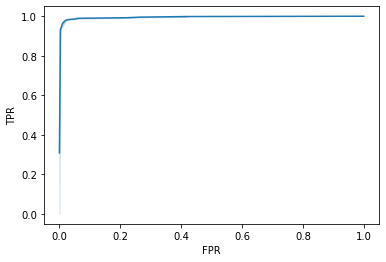

In [40]:
#Auc when we have almost all the features
res1 = logRegL1.fit(Xtrain, ytrain)
ytest_hat = res1.predict(Xtest)
compute_performance(ytest_hat, ytest, res1.classes_)

def aucPloter(model, ytest, Xtest):
    #ytest_probability = logRegL1['reg'].predict_proba(Xtest)
    ytest_probability = model.predict_proba(Xtest)
    fpr, tpr, _ = roc_curve(ytest, ytest_probability[:,1], pos_label=1)
    ax=sns.lineplot(x=fpr, y=tpr)
    ax.set(xlabel="FPR",ylabel="TPR")
    pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\Auc1.png')
    auc(fpr,tpr)
aucPloter(res1, ytest, Xtest)

#testInputC

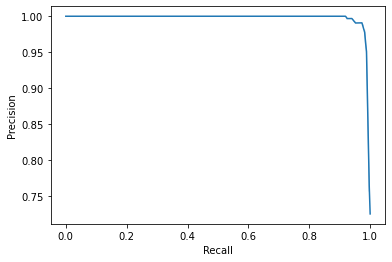

In [41]:
#Roc for LogRegL1 for when we have almost all  of the features
def rocPloter(model, ytest, Xtest):
    ytest_prob = model.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, ytest_prob[:,1], pos_label=1)
    ax=sns.lineplot(x=recall, y=precision)
    ax.set(xlabel="Recall",ylabel="Precision")
    pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\Roc1.png')
rocPloter(res1, ytest, Xtest)


In [20]:
#Accuracy when LogRegL2 when we have all the features
res2 = logRegL2.fit(Xtrain, ytrain)
ytest_hat = res2.predict(Xtest)
compute_performance(ytest_hat, ytest, res2.classes_)

Accuracy: 0.973 Recall: 0.985 Precision: 0.965


In [21]:
#Accuracy for different sizes of traing sets
size=np.linspace(0.1, 0.9, num=9)
newX23 = df.drop(['Q25','IQR','meanfun', 'label','sp.ent','sfm','sd','centroid','median','meanfreq'], axis = 'columns')

for i in size:
    Xtrain, Xtest, ytrain, ytest = train_test_split(newX23, newy, test_size=i, random_state=0) 
    print(i)
    res1 = logRegL1.fit(Xtrain, ytrain)
    ytest_hat = res1.predict(Xtest)
    compute_performance(ytest_hat, ytest, res1.classes_)

0.1
Accuracy: 0.732 Recall: 0.737 Precision: 0.75
0.2
Accuracy: 0.702 Recall: 0.703 Precision: 0.722
0.30000000000000004
Accuracy: 0.698 Recall: 0.715 Precision: 0.707
0.4
Accuracy: 0.695 Recall: 0.695 Precision: 0.713
0.5
Accuracy: 0.701 Recall: 0.702 Precision: 0.711
0.6
Accuracy: 0.698 Recall: 0.706 Precision: 0.698
0.7000000000000001
Accuracy: 0.703 Recall: 0.737 Precision: 0.694
0.8
Accuracy: 0.702 Recall: 0.762 Precision: 0.679
0.9
Accuracy: 0.694 Recall: 0.678 Precision: 0.704


In [43]:
#dataframe with some of the features
newX1 = df.drop(['Q25','IQR','meanfun', 'label','sp.ent','sfm','sd'], axis = 'columns')
y = df.label.values
le = LabelEncoder()
le.fit(y)
newy1 = le.transform(y)
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(newX1, newy, test_size=0.2, random_state=0)
df.head()
len(df)
len (newX1)
len(newy1)

3168

In [44]:
#Accuracy for LogRegL1 for when we have some of the features
res11 = logRegL1.fit(Xtrain1, ytrain1)
ytest_hat1 = res11.predict(Xtest1)
compute_performance(ytest_hat1, ytest1, res11.classes_)

Accuracy: 0.828 Recall: 0.832 Precision: 0.839


Accuracy: 0.828 Recall: 0.832 Precision: 0.839


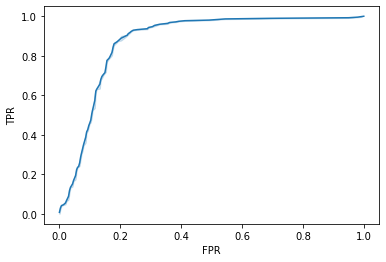

In [45]:
#Auc for LogRegL1 for when we have some of the features

res11 = logRegL1.fit(Xtrain1, ytrain1)
ytest_hat1 = res11.predict(Xtest1)
compute_performance(ytest_hat1, ytest1, res11.classes_)

def aucPloter(model, ytest, Xtest):
    #ytest_probability = logRegL1['reg'].predict_proba(Xtest)
    ytest_probability = model.predict_proba(Xtest)
    fpr, tpr, _ = roc_curve(ytest, ytest_probability[:,1], pos_label=1)
    ax=sns.lineplot(x=fpr, y=tpr)
    ax.set(xlabel="FPR",ylabel="TPR")
    pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\Auc2.png')
    auc(fpr,tpr)
aucPloter(res11, ytest1, Xtest1)
#testInputC

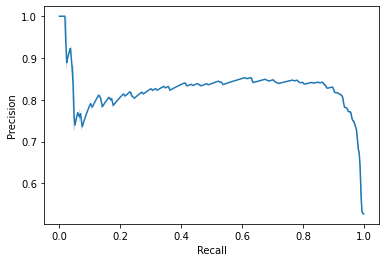

In [46]:
#Roc for LogRegL1 for when we have some of the features
def rocPloter(model, ytest, Xtest):
    ytest_prob = model.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, ytest_prob[:,1], pos_label=1)
    ax=sns.lineplot(x=recall, y=precision)
    ax.set(xlabel="Recall",ylabel="Precision")
    pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\Roc2.png')
rocPloter(res11, ytest1, Xtest1)


In [58]:
#Bootstrap for accuracies for when we have some of the features

def BootstrapPred2(data,numboot,regr):
    Y_Pred=[]   
    #y_pred=np.zeros((numboot,3168))
    Acc=[]
    #n_size=int(n*0.5)
    
    n=len(data)
    #theta = np.zeros((numboot,2))    
    for i in range(numboot):
    
        
        
        d = data.sample(n, replace=True)
        y = d.label.values
        le = LabelEncoder()
        le.fit(y)
        newy = le.transform(y)
        
        Xboot = d.drop(['Q25','IQR','meanfun', 'label','sp.ent','sfm','sd'], axis = 'columns')
        
        
        #Xtrain, Xtest, ytrain, ytest = train_test_split(Xboot,newy,test_size=0.5, random_state=0)
        
        
        X_fit = np.c_[Xboot]
        regr.fit(X_fit,newy)
        X=np.array(Xboot)
        
        y_pred=regr.predict(X)
        Y_Pred.append(y_pred)
        
        
        classes=regr.fit(X_fit,newy).classes_
        tp = sum(np.logical_and(y_pred == classes[1], newy == classes[1]))
        tn = sum(np.logical_and(y_pred == classes[0], newy == classes[0]))
        fp = sum(np.logical_and(y_pred == classes[1], newy == classes[0]))
        fn = sum(np.logical_and(y_pred == classes[0], newy == classes[1]))

        #print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
        acc = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)    
        sensitivity = recall
        specificity = tn / (fp + tn)
        Acc.append(acc)


    return Acc


In [59]:
#accuracy when we have some of the features
Acc2=BootstrapPred2(df,300,logRegL1)
Acc2

[0.8295454545454546,
 0.8194444444444444,
 0.8184974747474747,
 0.8207070707070707,
 0.8254419191919192,
 0.8244949494949495,
 0.8339646464646465,
 0.8203914141414141,
 0.8308080808080808,
 0.8276515151515151,
 0.8431186868686869,
 0.8162878787878788,
 0.8121843434343434,
 0.8314393939393939,
 0.8248106060606061,
 0.8276515151515151,
 0.8446969696969697,
 0.819760101010101,
 0.8194444444444444,
 0.8238636363636364,
 0.8421717171717171,
 0.834280303030303,
 0.8314393939393939,
 0.8295454545454546,
 0.8254419191919192,
 0.8323863636363636,
 0.8361742424242424,
 0.8273358585858586,
 0.8254419191919192,
 0.8380681818181818,
 0.834280303030303,
 0.8339646464646465,
 0.8254419191919192,
 0.8156565656565656,
 0.8308080808080808,
 0.8390151515151515,
 0.8235479797979798,
 0.8232323232323232,
 0.8131313131313131,
 0.8232323232323232,
 0.8345959595959596,
 0.8279671717171717,
 0.8446969696969697,
 0.8210227272727273,
 0.8166035353535354,
 0.8390151515151515,
 0.8115530303030303,
 0.8301767676767

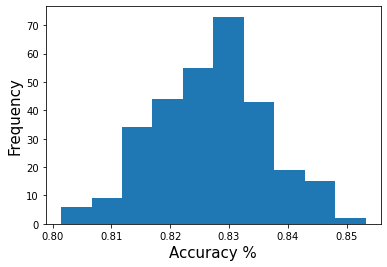

95.0 confidence interval 80.9% and 84.5%


In [60]:
# plot Accs when we have some of the features
pyplot.xlabel('Accuracy %',fontsize=15)
pyplot.ylabel('Frequency',fontsize=15)
pyplot.hist(Acc2)
pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\ConfidenceInterval3.png')
pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(Acc2, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(Acc2, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [51]:
#dataframe with less features 

newX2 = df.drop(['Q25','IQR','meanfun', 'label','sp.ent','sfm','sd','centroid','median','meanfreq'], axis = 'columns')
y = df.label.values
le = LabelEncoder()
le.fit(y)
newy2 = le.transform(y)
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(newX2, newy, test_size=0.2, random_state=0)
df.head()
len(df)
len (newX2)
len(newy2)

3168

In [61]:
#Accuracy for LogRegL1 for when we have less features
res12 = logRegL1.fit(Xtrain2, ytrain2)
ytest_hat2 = res12.predict(Xtest2)
compute_performance(ytest_hat2, ytest2, res12.classes_)

Accuracy: 0.702 Recall: 0.703 Precision: 0.722


In [53]:
#Bootstrap for accuracies for when we have less features

def BootstrapPred3(data,numboot,regr):
    Y_Pred=[]   
    #y_pred=np.zeros((numboot,3168))
    Acc=[]
    #n_size=int(n*0.5)
    
    n=len(data)
    #theta = np.zeros((numboot,2))    
    for i in range(numboot):
    
        
        
        d = data.sample(n, replace=True)
        y = d.label.values
        le = LabelEncoder()
        le.fit(y)
        newy = le.transform(y)
        
        Xboot = d.drop(['Q25','IQR','meanfun', 'label','sp.ent','sfm','sd','centroid','median','meanfreq'], axis = 'columns')
        
        
        #Xtrain, Xtest, ytrain, ytest = train_test_split(Xboot,newy,test_size=0.5, random_state=0)
        
        
        X_fit = np.c_[Xboot]
        regr.fit(X_fit,newy)
        X=np.array(Xboot)
        
        y_pred=regr.predict(X)
        Y_Pred.append(y_pred)
        
        
        classes=regr.fit(X_fit,newy).classes_
        tp = sum(np.logical_and(y_pred == classes[1], newy == classes[1]))
        tn = sum(np.logical_and(y_pred == classes[0], newy == classes[0]))
        fp = sum(np.logical_and(y_pred == classes[1], newy == classes[0]))
        fn = sum(np.logical_and(y_pred == classes[0], newy == classes[1]))

        #print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
        acc = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)    
        sensitivity = recall
        specificity = tn / (fp + tn)
        Acc.append(acc)


    return Acc


In [54]:
#Accuracy when we have less features
Acc3=BootstrapPred3(df,300,logRegL1)
print(Acc3)

[0.7200126262626263, 0.7048611111111112, 0.7105429292929293, 0.7105429292929293, 0.7136994949494949, 0.7133838383838383, 0.7089646464646465, 0.7039141414141414, 0.726010101010101, 0.7073863636363636, 0.70864898989899, 0.7083333333333334, 0.7155934343434344, 0.6985479797979798, 0.7124368686868687, 0.7058080808080808, 0.7203282828282829, 0.7080176767676768, 0.7140151515151515, 0.7266414141414141, 0.7130681818181818, 0.7067550505050505, 0.7143308080808081, 0.71875, 0.7206439393939394, 0.7136994949494949, 0.7111742424242424, 0.7118055555555556, 0.7102272727272727, 0.702020202020202, 0.7023358585858586, 0.7095959595959596, 0.7250631313131313, 0.7064393939393939, 0.7178030303030303, 0.7083333333333334, 0.6950757575757576, 0.7017045454545454, 0.7171717171717171, 0.7209595959595959, 0.709280303030303, 0.7064393939393939, 0.702020202020202, 0.7058080808080808, 0.7231691919191919, 0.7178030303030303, 0.704229797979798, 0.7130681818181818, 0.7073863636363636, 0.7174873737373737, 0.711174242424242

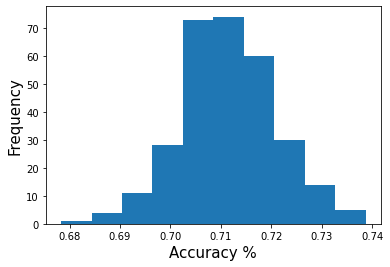

95.0 confidence interval 69.4% and 73.1%


In [55]:
# plot Accs when we have less features
pyplot.xlabel('Accuracy %',fontsize=15)
pyplot.ylabel('Frequency',fontsize=15)
pyplot.hist(Acc3)
pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\ConfidenceInterval4.png')
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(Acc3, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(Acc3, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Accuracy: 0.702 Recall: 0.703 Precision: 0.722


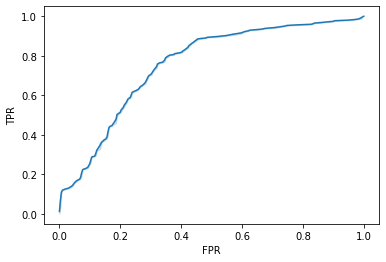

In [56]:
res12 = logRegL1.fit(Xtrain2, ytrain2)
ytest_hat2 = res12.predict(Xtest2)
compute_performance(ytest_hat2, ytest2, res12.classes_)

def aucPloter(model, ytest, Xtest):
    #ytest_probability = logRegL1['reg'].predict_proba(Xtest)
    ytest_probability = model.predict_proba(Xtest)
    fpr, tpr, _ = roc_curve(ytest, ytest_probability[:,1], pos_label=1)
    ax=sns.lineplot(x=fpr, y=tpr)
    ax.set(xlabel="FPR",ylabel="TPR")
    pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\Auc3.png')
    auc(fpr,tpr)
aucPloter(res12, ytest2, Xtest2)
#testInputC

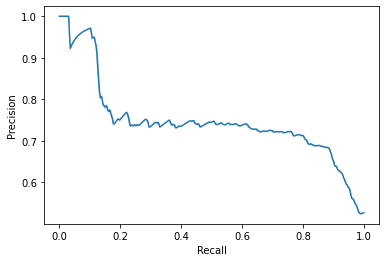

In [57]:
def rocPloter(model, ytest, Xtest):
    ytest_prob = model.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, ytest_prob[:,1], pos_label=1)
    ax=sns.lineplot(x=recall, y=precision)
    ax.set(xlabel="Recall",ylabel="Precision")
    pyplot.savefig(r'C:\Users\Farnoush\Desktop\CS Project\Roc3.png')
rocPloter(res12, ytest2, Xtest2)

In [63]:
logRegL1P2 = Pipeline([
    ('standardize', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2,include_bias = False)),
    ('reg', LogisticRegression(penalty='l1', solver='liblinear'))
])

In [64]:
res = logRegL1P2.fit(Xtrain, ytrain)

ytest_hat = res.predict(Xtest)
compute_performance(ytest_hat, ytest, res.classes_)
aucPloter(res, ytest)
plt.figure()
rocPloter(res, ytest, Xtest)


Accuracy: 0.978 Recall: 0.973 Precision: 0.985


TypeError: aucPloter() missing 1 required positional argument: 'Xtest'

In [153]:
cov = res.cov_params()
gradient = (ytest_hat* (1 - ytest_hat) * Xtest.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, ytest_hat + std_errors * c))
lower = np.maximum(0, np.minimum(1, ytest_hat - std_errors * c))

print(upper,lower)

AttributeError: 'Pipeline' object has no attribute 'cov_params'

In [10]:
res = LogisticRegression(penalty='l1', solver='liblinear').fit(Xtrain, ytrain)
ytest_hat = res.predict(Xtest)
compute_performance(ytest_hat, ytest, res.classes_)
aucPloter(res, ytest)
plt.figure()
rocPloter(res, ytest, Xtest)

Accuracy: 0.968 Recall: 0.988 Precision: 0.954


NameError: name 'aucPloter' is not defined

In [65]:
res = LogisticRegression(penalty='l1', solver='liblinear').fit(Xtrain, ytrain)
ytest_hat = res.predict(Xtest)
compute_performance(ytest_hat, ytest, res.classes_)
aucPloter(res, ytest)
plt.figure()
rocPloter(res, ytest, Xtest)

Accuracy: 0.968 Recall: 0.988 Precision: 0.954


TypeError: aucPloter() missing 1 required positional argument: 'Xtest'

In [ ]:
cov = model.cov_params()
gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

plt.plot(x, proba)
plt.plot(x, lower, color='g')
plt.plot(x, upper, color='g')
plt.show()